C:\Users\rbstj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65381 (\N{HALFWIDTH KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


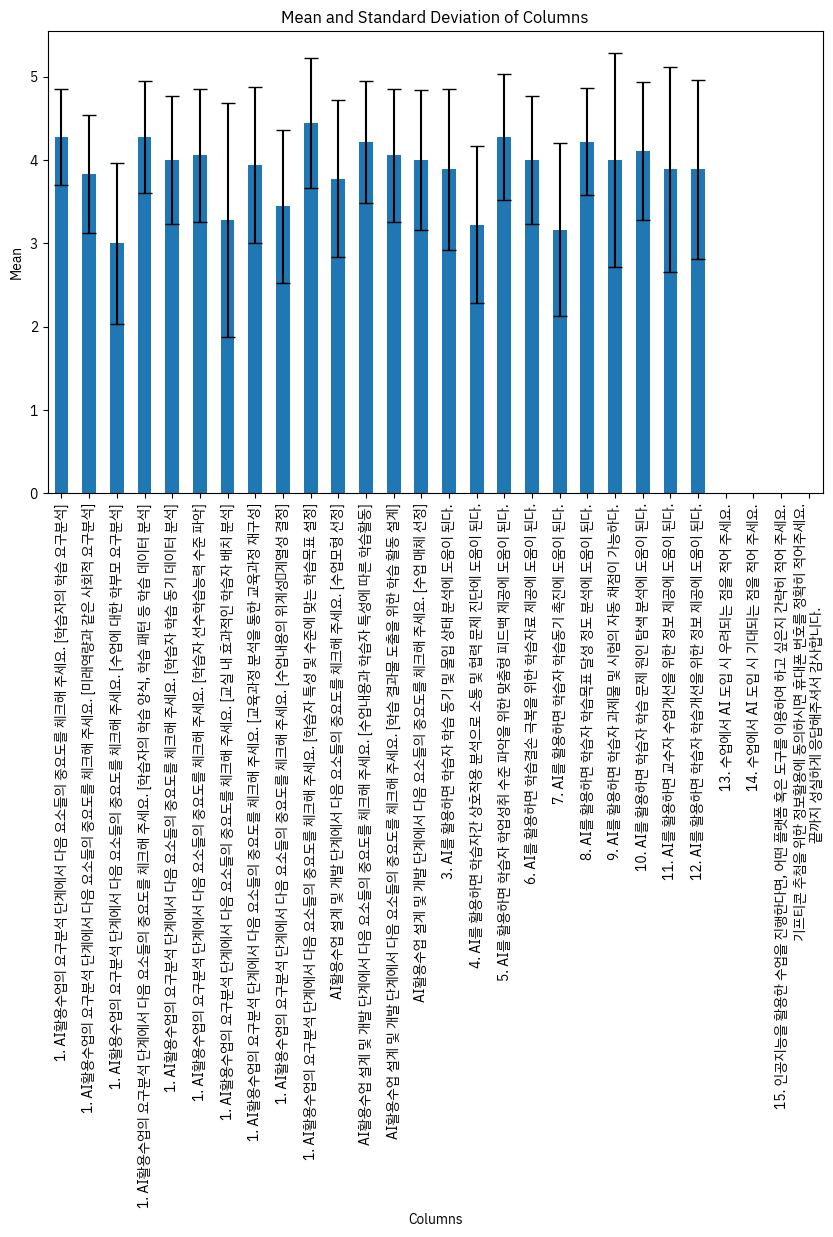

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "IBMPlexSansKR-Text.ttf"  # 한글 폰트 파일(.ttf)의 경로를 지정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

# xlsx 파일 읽기
df = pd.read_excel("data.xlsx")

# 문자열 값을 숫자로 매핑하기 위한 딕셔너리 생성
mapping = {"전혀 중요하지 않음": 1, "중요하지 않음": 2, "보통": 3, "중요함": 4, "매우 중요함": 5}

# 각 column의 문자열 값을 숫자로 변환
df = df.apply(lambda x: x.map(mapping) if x.dtype == "O" else x)

# 각 column의 평균 계산을 위해 숫자 값만 선택
numeric_df = df.select_dtypes(include=[int, float])

# 각 column의 평균 계산
mean_values = numeric_df.mean()

# 각 column의 표준 편차 계산
stddev_values = numeric_df.std()

# 그래프 생성
plt.figure(figsize=(10, 6))
mean_values.plot(kind="bar", yerr=stddev_values, capsize=5)

# 그래프 레이블 설정
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.title("Mean and Standard Deviation of Columns")

# 그래프 출력
plt.show()
